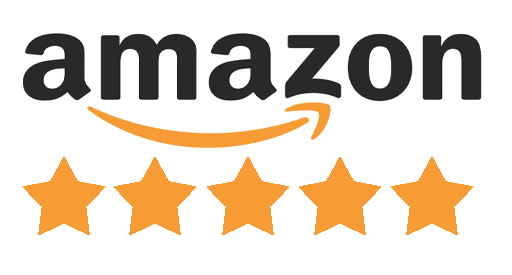

####INTRODUCTION

This is an amazon dataset that is in a text format . I want use sentimental analysis for product reviews to get a realworld of Natural Lnaguage Processing(NLP)

####AIM AND GOAL
The main aim of the analysis is to understand text analysis and Machine Learning sentiment classification

The goal is to build a model that can classify each review as positive, Negative and Neutral based on the text context



Importing the important Libraries

In [158]:
import pandas as pd
import numpy as np
import nltk # Natural language toolkit
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re  # Regular expression
from textblob import TextBlob  # Used for text
from wordcloud import WordCloud  # Fix the import statement
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show")

pd.set_option('display.max_columns', None)


># Reading the data

In [159]:
df = pd.read_csv('/content/Amazon Product Review.txt')
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [161]:
df.shape

(30846, 16)

In [162]:
# to get a ssummary of the data usingg describe
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


There are obvvious outliers in the helpful vvotes and total vote column


In [163]:
#to check for unique values in each columms
unique_values_per_column = df.apply(lambda x: x.unique())
unique_values_per_column

marketplace                                                       [US]
customer_id          [11555559, 31469372, 26843895, 19844868, 11898...
review_id            [R1QXC7AHHJBQ3O, R175VSRV6ZETOP, R2HRFF78MWGY1...
product_id           [B00IKPX4GY, B00IKPYKWG, B00IKPW0UA, B00LCHSHM...
product_parent                                               [2693241]
product_title                  [Fire HD 7, 7" HD Display, Wi-Fi, 8 GB]
product_category                                                  [PC]
star_rating                                            [5, 3, 4, 2, 1]
helpful_votes        [0, 1, 2, 4, 3, 5, 20, 7, 56, 9, 8, 15, 6, 16,...
total_votes          [0, 1, 2, 4, 3, 5, 21, 7, 23, 9, 10, 8, 11, 19...
vine                                                               [N]
verified_purchase                                               [Y, N]
review_headline      [Five Stars, Lots of ads Slow processing speed...
review_body          [Great love it, Lots of ads<br />Slow processi...
review

># Data Cleaning


In [164]:
#Confirming for missing values
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [165]:
#Checking for duplicate values
df.duplicated().sum()

0

># EDA

to see the count of star rating and to see how many timme each rating occurs


In [166]:
df['star_rating'].value_counts()

5    20019
4     5748
3     2216
1     1708
2     1155
Name: star_rating, dtype: int64

A bar graph to get more understanding about the rating  

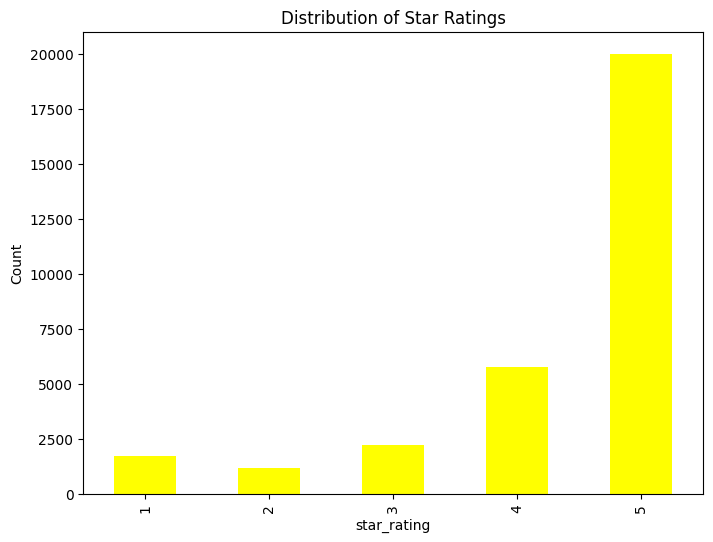

In [167]:
plt.figure(figsize=(8, 6))
df['star_rating'].value_counts().sort_index().plot(kind='bar', color='yellow')
plt.title('Distribution of Star Ratings')
plt.xlabel('star_rating')
plt.ylabel('Count')
plt.show()

The 5 star rating has the highest while the 2 rating has the lowest


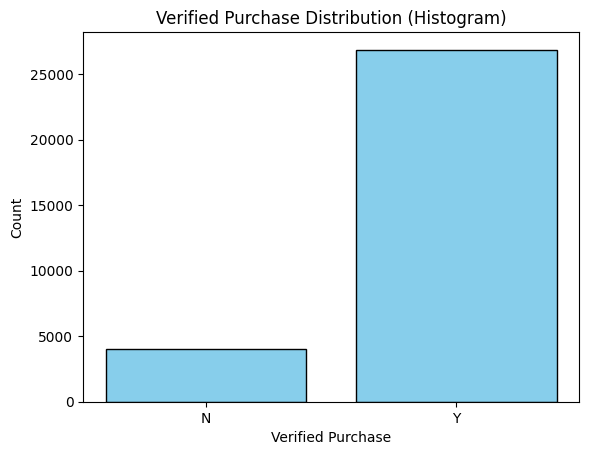

In [168]:
#percentage of verified purchaser to non verified using histogram  to do this we change the Y and No to 1 and O

df['verified_purchase_numeric'] = df['verified_purchase'].map({'Y': 1, 'N': 0})

# Plotting the histogram
plt.hist(df['verified_purchase_numeric'], bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue', rwidth=0.8)
plt.xticks([0, 1], ['N', 'Y'])
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Verified Purchase Distribution (Histogram)')
plt.show()


This indicates that most of the reviews we got are from verified and were positive revies therefore we have can go ahead analysing

In [169]:
df.helpful_votes.count()

30846

###IMPLEMENTING ALGORITHM
Will need to convert the reviews to what will be readable by python and clean it from punctuations, there will also be categorised to positive, negative and neutral


lets see the first 10 of the reviews

In [170]:
df.review_body.head(10)

0                                        Great love it
1    Lots of ads<br />Slow processing speed<br />Oc...
2    Excellent unit.  The versatility of this table...
3    I bought this on Amazon Prime so I ended up bu...
4    All Amazon products continue to meet my expect...
5                            Good product. I like it 😀
6    This kindle works well but the battery goes de...
7    I really enjoy my new kindle, it is easy to us...
8    It's what I wanted and performs perfectly. Eve...
9                      Made well. Like looks and style
Name: review_body, dtype: object

In [171]:
#A sample of what a review looks like
sample_review = df.review_body[1500]

sample_review

'Still very functional. Has great graphics. A good chunk of the memory is taken up by the OS. Has the ability to create multiple profiles but each profile sucks up a lot of memory.'

In [172]:
df['review_body'] = df['review_body'].astype(str)

# Now 'review_body' is converted to a string
print(df['review_body'][1500])

#re.sub(r'[^a-zA-Z0-9\s]','', review_body)

Still very functional. Has great graphics. A good chunk of the memory is taken up by the OS. Has the ability to create multiple profiles but each profile sucks up a lot of memory.


In [173]:
def clean_text(Review):
  Review = str(Review)  #converting the review to string to perform the cleaning
  Review = re.sub('\[.*?\]','',Review)
  Review = re.sub('https?://\S+|www\.\S+', '', Review)
  Review = re.sub(r'[^a-zA-Z0-9\s]','', Review)
  Review = re.sub('\n', '', Review)
  Review = re.sub('\w*\d\w*','', Review)
  return Review
df['review_body'] =  df['review_body']. apply(clean_text)
df['review_body'][1500]





'Still very functional Has great graphics A good chunk of the memory is taken up by the OS Has the ability to create multiple profiles but each profile sucks up a lot of memory'


Cleaning the text b removing puntuations,Html,Url and converting to lower case to be ML readable   

In [174]:
import re # regular expression

def clean_text(Review):
    #Review = str(Review).lower()  # converting the review to string to perform the cleaning
    Review = re.sub('\[.*?\]', '', Review)
    Review = re.sub('https?://\+|www\.\+', '', Review)
    Review = re.sub(r'[^A-Za-z0-9\s]', '', Review)  # Include both lowercase and uppercase letters
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

# Assuming df is your DataFrame
amazon_review= df['review_body'].apply(clean_text)
print(amazon_review)


0                                            Great love it
1        Lots of adsbr Slow processing speedbr Occasion...
2        Excellent unit  The versatility of this tablet...
3        I bought this on Amazon Prime so I ended up bu...
4        All Amazon products continue to meet my expect...
                               ...                        
30841    I purchased the original Kindle Fire in  and t...
30842    Im writing this review with the benefit of bei...
30843    I purchased this Kindle for my grandma because...
30844    I bought my tablet Fire HD  at Best Buy on the...
30845    Am impressive piece of hardware for the  No re...
Name: review_body, Length: 30846, dtype: object


In [175]:
df['review_body']

0                                            Great love it
1        Lots of adsbr Slow processing speedbr Occasion...
2        Excellent unit  The versatility of this tablet...
3        I bought this on Amazon Prime so I ended up bu...
4        All Amazon products continue to meet my expect...
                               ...                        
30841    I purchased the original Kindle Fire in  and t...
30842    Im writing this review with the benefit of bei...
30843    I purchased this Kindle for my grandma because...
30844    I bought my tablet Fire HD  at Best Buy on the...
30845    Am impressive piece of hardware for the  No re...
Name: review_body, Length: 30846, dtype: object

Will Import Text Vectorisation to interpret the text data into a numerical format that machine learning models could interpret


##Machine Learning Models



In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

##Proceed to Building the ML Model


In [177]:
#Define Features and Target Variable(x,y),then split the data
x = amazon_review
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

#check the size of the data
print('size of x_train:', x_train.shape)
print('size of y_train:', y_train.shape)
print('size of x_test:', x_test.shape)
print('size of y_test:', y_test.shape)


size of x_train: (24676,)
size of y_train: (24676,)
size of x_test: (6170,)
size of y_test: (6170,)


In [178]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create the model
model = LogisticRegression()

# Fit the model
model.fit(x_train_tfidf, y_train)

# Test the model by making some predictions
y_pred = model.predict(x_test_tfidf)

In [179]:
model

LogisticRegression()

In [180]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy: 2f}%'.format(accuracy*100))


Test Accuracy:  0.906807%


LabelEncoder is used to convert string labels to numeric values, to  ensure to fit the encoder on y_test to ensure consistent mapping between string labels and numeric values.

In [191]:
#
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Print confusion matrix
print(confusion_matrix(y_test_numeric, y_pred_numeric))
print('\n')

# Print classification report
print(classification_report(y_test_numeric, y_pred_numeric))

[[ 602  416]
 [ 159 4993]]


              precision    recall  f1-score   support

           0       0.79      0.59      0.68      1018
           1       0.92      0.97      0.95      5152

    accuracy                           0.91      6170
   macro avg       0.86      0.78      0.81      6170
weighted avg       0.90      0.91      0.90      6170



###MODEL INTERPRETATION
- TEST ACCURACY : A test accuracy of 90.68% means that the model was evaluated on a test dataset and it correctly predicted the target variable at approximately 90.68% of the time. In other words, the Logistic Regression Model used correctly classified the data in the test set at approximately 91%.
- CONFUSION MATRIX: [[ 602,  416]
                     [ 159, 4993]]
 This can be interpreted as
 -True Positive (TP): 4993 instances were correctly predicted as positive.
-True Negative (TN): 602 instances were correctly predicted as negative.
-False Positive (FP): 416 instances were incorrectly predicted as positive (Type I error).
-False Negative (FN): 159 instances were incorrectly predicted as negative (Type II error).                      

- CLASSIFICATION REPORT :The table you provided is a classification report, which includes precision, recall, and F1-score for each class (0 and 1) in a binary classification scenario. Here's how to interpret each metric:
- Precision: Out of all instances predicted as belonging to a particular class, how many were actually members of that class?

    - Precision for class 0: 0.79 (79%) - This means that when the model predicts class 0, it is correct about 79% of the time.
    - Precision for class 1: 0.92 (92%) - This means that when the model predicts class 1, it is correct about 92% of the time.

- Recall (Sensitivity): Out of all instances that actually belong to a particular class, how many were correctly predicted by the model?
    - Recall for class 0: 0.59 (59%) - This means that the model is able to capture 59% of all instances of class 0.
    - Recall for class 1: 0.97 (97%) - This means that the model is able to capture 97% of all instances of class 1.

- F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
    - F1-score for class 0: 0.68 - A value between 0 and 1, where higher values indicate a better balance between precision and recall.
    - F1-score for class 1: 0.95 - A high F1-score indicates a good balance between precision and recall for class 1.

- Support: The number of actual occurrences of each class in the test dataset.
    - Support for class 0: 1018 instances.
    - Support for class 1: 5152 instances.

- ACCURACY,MACRO AVG AND WEIGHTED AVG: The accuracy, macro-average, and weighted-average metrics in a classification report provide an overall view of your model's performance across multiple classes. Here's how to interpret each metric:

- Accuracy: The proportion of correctly classified instances among all instances.

    - Accuracy: 0.91 (91%) - This indicates that your model correctly predicted the target variable for approximately 91% of the instances in your dataset.
- Macro-average:Macro-average precision, recall, and F1-score are calculated by averaging the precision, recall, and F1-score for each class without considering class imbalance.
    - Macro-average precision: 0.86 (86%) - The average precision across all classes.
    - Macro-average recall: 0.78 (78%) - The average recall across all classes.
    - Macro-average F1-score: 0.81 - The average F1-score across all classes.

- Weighted-average: Weighted-average precision, recall, and F1-score are calculated by taking a weighted average based on the number of instances in each class.
    - Weighted-average precision: 0.90 (90%) - The weighted average precision, considering the number of instances in each class.
    - Weighted-average recall: 0.91 (91%) - The weighted average recall, considering the number of instances in each class.
    - Weighted-average F1-score: 0.90 - The weighted average F1-score, considering the number of instances in each class.    

####INSIGHTS
 ## - HIGH ACCURACY :
 The model has a high overall accuracy, indicating that it correctly predicts the target variable for approximately 91% of the instances in the dataset.

 ## **-GOOD PERFORANCE METRICS:**
  The precision, recall, and F1-score are also high
for both classes, indicating that the model is performing well on both positive and negative
reviews.

❖ **Confusion Matrix**: The confusion matrix shows that the model has more true positives and
true negatives than false positives and false negatives. This indicates that the model is
correctly classifying most of the review



## **RECOMMENDATION**
 - Keep an eye on overfitting: If there is a significant gap between the training and test accuracy, it may indicate overfitting. It is advisable to regularly assess the model's performance over time to verify its ability to generalize effectively to unseen data.
 - Utilize acquired insights: The knowledge extracted from the model can serve as a basis for enhancing products and services. For instance, by identifying specific aspects that customers express dissatisfaction with through negative reviews, initiatives can be undertaken to enhance those particular areas.
 - Account for Business Context: Tailor your approach based on the specific needs of your task. Consider whether minimizing false positives or false negatives aligns better with your objectives. For example, if misclassifying a negative review as positive (false positive) incurs higher costs, prioritize reducing false positives even if it results in an increase in false negatives, and vice versa.
 - Continuous Refinement: Constructing a machine learning model is an ongoing, iterative endeavor. It is advisable to consistently enhance the model by incorporating new data and feedback.
  
# In summary, the model performs well in terms of accuracy, but there is room for improvement in the precision and recall of class 0.
